In [23]:
import pandas as pd
import numpy as np

In [24]:
df = pd.read_csv('titanic_updated.csv')

In [25]:
df.head() # number = travelling with members

,Cabin,Ticket,number,Survived
0,NaN,A/5 21171,5,0
1,C85,PC 17599,3,1
2,NaN,STON/O2. 3101282,6,1
3,C123,113803,3,1
4,NaN,373450,A,0


In [26]:
df['number'].nunique()

7

In [27]:
df['number'].unique()

array(['5', '3', '6', 'A', '2', '1', '4'], dtype=object)

Text(0.5, 1.0, 'Passenger Travelling with')

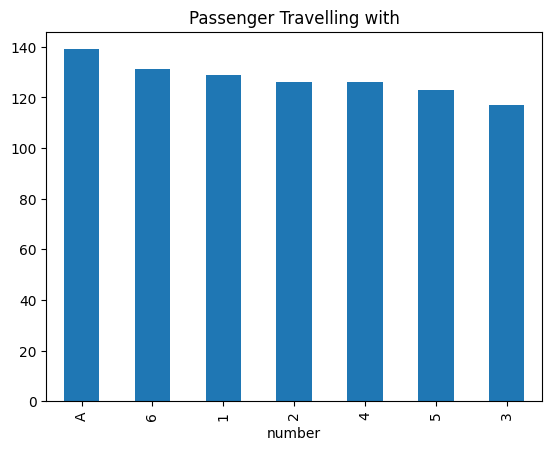

In [28]:
fig = df['number'].value_counts().plot.bar()
fig.set_title('Passenger Travelling with')

In [29]:
df['number_numerical'] = pd.to_numeric(df['number'],errors='coerce',downcast='integer')

In [30]:
df['number_numerical'] 

0      5.0
1      3.0
2      6.0
3      3.0
4      NaN
      ... 
886    3.0
887    3.0
888    1.0
889    2.0
890    3.0
Name: number_numerical, Length: 891, dtype: float64

In [31]:
df['number_categorical'] = np.where(df['number_numerical'].isnull(),df['number'],np.nan)

In [32]:
df

,Cabin,Ticket,number,Survived,number_numerical,number_categorical
0,NaN,A/5 21171,5,0,5.0,NaN
1,C85,PC 17599,3,1,3.0,NaN
2,NaN,STON/O2. 3101282,6,1,6.0,NaN
3,C123,113803,3,1,3.0,NaN
4,NaN,373450,A,0,NaN,A
...,...,...,...,...,...,...
886,NaN,211536,3,0,3.0,NaN
887,B42,112053,3,1,3.0,NaN
888,NaN,W./C. 6607,1,0,1.0,NaN
889,C148,111369,2,1,2.0,NaN


In [33]:
df['Cabin'].unique

<bound method Series.unique of 0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object>

In [34]:
df['cabin_num'] = df['Cabin'].str.extract('(\d+)') # to capture numerical part

df['cabin_cat'] = df['Cabin'].str[0] # capture the first letter

df.head()

,Cabin,Ticket,number,Survived,number_numerical,number_categorical,cabin_num,cabin_cat
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN
1,C85,PC 17599,3,1,3.0,NaN,85,C
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN
3,C123,113803,3,1,3.0,NaN,123,C
4,NaN,373450,A,0,NaN,A,NaN,NaN


In [35]:
df['cabin_cat'].value_counts()

cabin_cat
C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: count, dtype: int64

<Axes: xlabel='cabin_cat'>

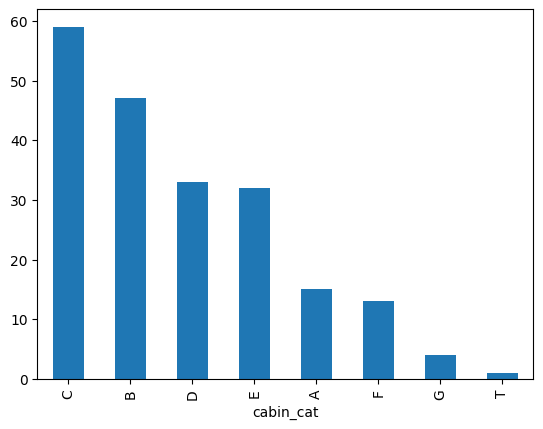

In [36]:
df['cabin_cat'].value_counts().plot(kind='bar')

In [37]:
df['Ticket_Number'] = df['Ticket'].apply(lambda s:s.split()[-1])

df['Ticket_Number'] = pd.to_numeric(df['Ticket_Number'],errors='coerce',downcast='integer')

df['Ticket_Category'] = df['Ticket'].apply(lambda s:s.split()[0])

df['Ticket_Category'] = np.where(df['Ticket_Category'].str.isdigit(),np.nan,df['Ticket_Category'])

In [38]:
df.head()

,Cabin,Ticket,number,Survived,number_numerical,number_categorical,cabin_num,cabin_cat,Ticket_Number,Ticket_Category
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN,21171.0,A/5
1,C85,PC 17599,3,1,3.0,NaN,85,C,17599.0,PC
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN,3101282.0,STON/O2.
3,C123,113803,3,1,3.0,NaN,123,C,113803.0,NaN
4,NaN,373450,A,0,NaN,A,NaN,NaN,373450.0,NaN
